文档：验证res_TIMs_evulation.py，res_manager.py等代码的正确性

In [1]:
# 函数导入
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from res_manager import ResManager
from res_configs import ResConfigs, Params, TempConfigs, TIMsConfigs
from res_TIMs_evaluation import TIMsEvaluation

指定均质储层和异质储层的信号

ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=[0.2, 0.2, 0.8, 0.2, 0.2], random_seed=1234, beta_size_ref=20, custom_sizes=None)
Heterogeneous sizes: [19.35410189849777, 15.752562557363024, 19.200600575050103, 18.690686220852612, 22.267164297902575]
ResConfigs(morph_type='uniform', n_instances=1, size_range=(20, 30), weights=None, random_seed=1234, beta_size_ref=20, custom_sizes=None)


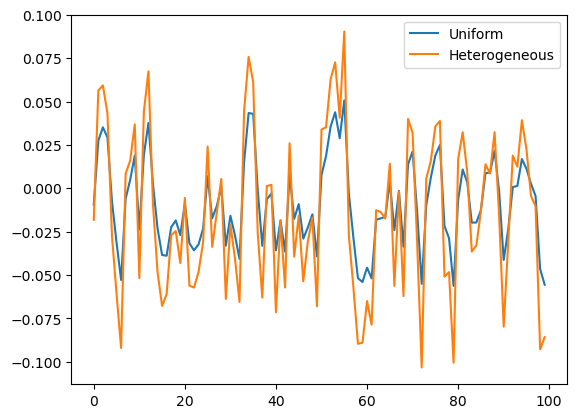

In [2]:
# 1. Configs
params_configs = Params(Nvirt=1, m0=0.03)

# 2. ResConfigs
weights = [0.2, 0.2, 0.8, 0.2, 0.2]
res_configs_hetero = ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=weights)
res_configs_hetero.beta_size_ref = 20 

# 2.1 ResConfigs for uniform
res_configs_uniform = ResConfigs(morph_type='uniform')
res_configs_uniform.beta_size_ref = 20 

# TempConfigs 中应该包含 beta_temp_ref，注意检查定义
temp_configs = TempConfigs(temp_mode='temp_sweep', beta_temp_ref=20, temp_range=(15, 25, 1))

tims_configs = TIMsConfigs()

# 3. build the Manager
spn_hetero = ResManager(params_configs, res_configs_hetero, temp_configs, tims_configs, verbose=True)
spn_uniform = ResManager(params_configs, res_configs_uniform, temp_configs, tims_configs, verbose=True)

# 4. create the signal
signal_seed = 42
input_signal = np.random.RandomState(signal_seed).rand(100, 1) - 0.5

# 5. transform the signal
env_temp = 20
S_hetero, J_hetero = spn_hetero.transform(input_signal, env_temp)
S_uniform, J_uniform = spn_uniform.transform(input_signal, env_temp)

# 6. plot the result
plt.plot(S_uniform)
plt.plot(S_hetero)
plt.legend(['Uniform', 'Heterogeneous'])
plt.show()

如果异质储层采用单一权重，其输出与均匀储层一致

ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=[0, 0, 1, 0, 0], random_seed=1234, beta_size_ref=20, custom_sizes=[18, 19, 20, 21, 22])
ResConfigs(morph_type='uniform', n_instances=1, size_range=(20, 30), weights=None, random_seed=1234, beta_size_ref=20, custom_sizes=None)


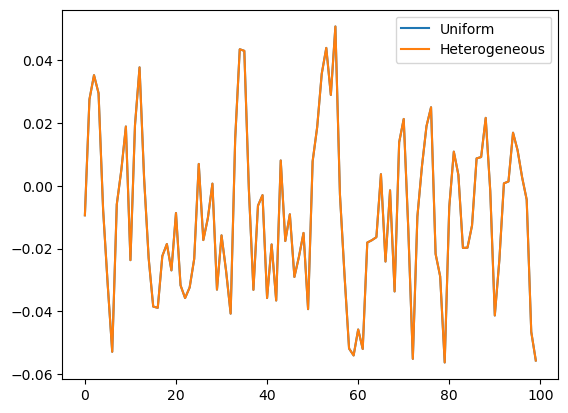

In [17]:
# 1. Configs
params_configs = Params(Nvirt=1, m0=0.03)

# 2. ResConfigs
weights = [0, 0, 1, 0, 0]
custom_sizes = [18,19,20,21,22]
res_configs_hetero = ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=weights, custom_sizes=custom_sizes)
res_configs_hetero.beta_size_ref = 20 

# 2.1 ResConfigs for uniform
res_configs_uniform = ResConfigs(morph_type='uniform')
res_configs_uniform.beta_size_ref = 20 

# TempConfigs 中应该包含 beta_temp_ref，注意检查定义
temp_configs = TempConfigs(temp_mode='temp_sweep', beta_temp_ref=20, temp_range=(15, 25, 1))

tims_configs = TIMsConfigs()

# 3. build the Manager
spn_hetero = ResManager(params_configs, res_configs_hetero, temp_configs, tims_configs, verbose=True)
spn_uniform = ResManager(params_configs, res_configs_uniform, temp_configs, tims_configs, verbose=True)

# 4. create the signal
signal_seed = 42
input_signal = np.random.RandomState(signal_seed).rand(100, 1) - 0.5

# 5. transform the signal
env_temp = 20
S_hetero, J_hetero = spn_hetero.transform(input_signal, env_temp)
S_uniform, J_uniform = spn_uniform.transform(input_signal, env_temp)

# 6. plot the result
plt.plot(S_uniform)
plt.plot(S_hetero)
plt.legend(['Uniform', 'Heterogeneous'])
plt.show()

查看均质储层在变温环境下的输出信号

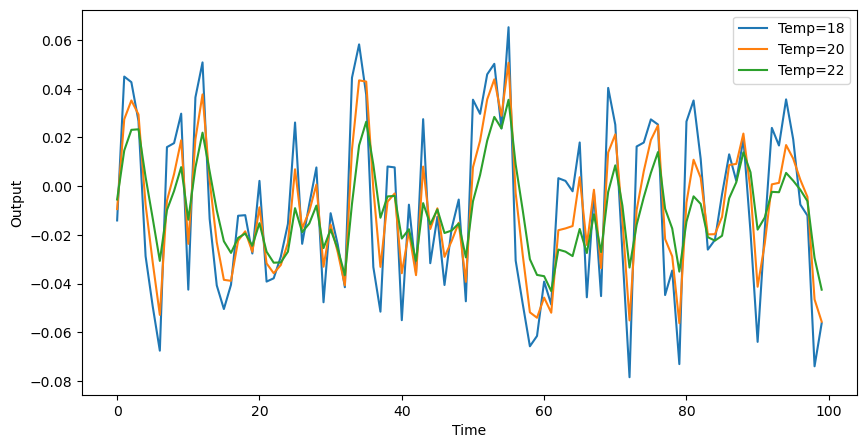

In [4]:
# 0. 数据保存
results = {}

plt.figure(figsize=(10, 5))
signal_seed = 42
input_signal = np.random.RandomState(signal_seed).rand(100, 1) - 0.5

# 0.1 温度扫描
# 注意：range(18, 23, 1)生成的是[18,19,20,21,22]
temp_range = range(18, 23, 2)

for temp in temp_range:
    # 1. Configs
    params_configs = Params(Nvirt=1, m0=0.03)

    # 2.1 ResConfigs for uniform
    res_configs_uniform = ResConfigs(morph_type='uniform')
    res_configs_uniform.beta_size_ref = 20 

    # TempConfigs 中应该包含 beta_temp_ref，注意检查定义
    temp_configs = TempConfigs(temp_mode='temp_sweep', beta_temp_ref=20, temp_range=(15, 25, 1))
    tims_configs = TIMsConfigs()

    # 3. build the Manager
    spn_uniform = ResManager(params_configs, res_configs_uniform, temp_configs, tims_configs)

    # 4. transform the signal
    env_temp = temp
    S_uniform, J_uniform = spn_uniform.transform(input_signal, env_temp)

    results[temp] = S_uniform  # temp直接用作key，便于后续legend

# 画图，每条线只设置一次legend，最后统一legend
for temp, S in results.items():
    plt.plot(S, label=f"Temp={temp}")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Output")
plt.show()

查看异质储层在变温环境下的输出信号

ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=[0.2, 0.2, 0.4, 0.2, 0.2], random_seed=1234, beta_size_ref=20, custom_sizes=[15, 19, 20, 21, 25])
[[-0.12545988]
 [ 0.45071431]
 [ 0.23199394]]
ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=[0.2, 0.2, 0.4, 0.2, 0.2], random_seed=1234, beta_size_ref=20, custom_sizes=[15, 19, 20, 21, 25])
[[-0.12545988]
 [ 0.45071431]
 [ 0.23199394]]
ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=[0.2, 0.2, 0.4, 0.2, 0.2], random_seed=1234, beta_size_ref=20, custom_sizes=[15, 19, 20, 21, 25])
[[-0.12545988]
 [ 0.45071431]
 [ 0.23199394]]


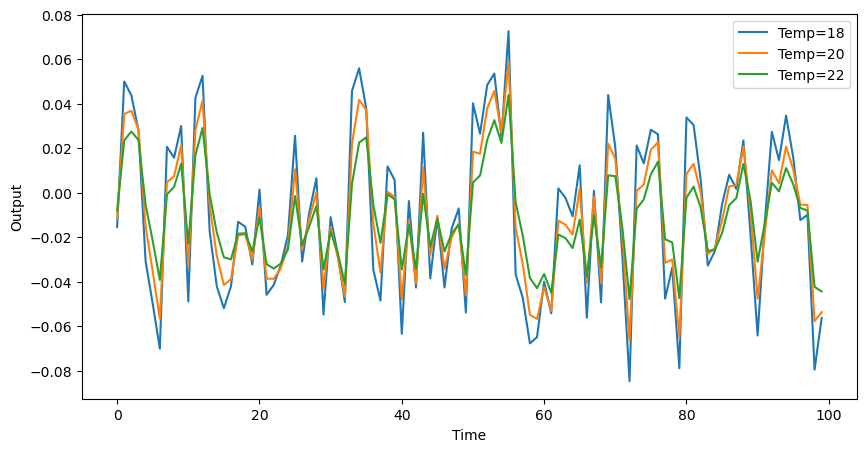

In [22]:
# 0. 数据保存
results = {}

plt.figure(figsize=(10, 5))
signal_seed = 42
input_signal = np.random.RandomState(signal_seed).rand(100, 1) - 0.5

# 0.1 温度扫描
# 注意：range(18, 23, 1)生成的是[18,19,20,21,22]
temp_range = range(18, 23, 2)

for temp in temp_range:
    # 1. Configs
    params_configs = Params(Nvirt=1, m0=0.03)

    # 2.1 ResConfigs for uniform
    weights = [0.2, 0.2, 0.4, 0.2, 0.2]
    res_configs_hetero = ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=weights, custom_sizes=[15,19,20,21,25])
    res_configs_hetero.beta_size_ref = 20 

    # TempConfigs 中应该包含 beta_temp_ref，注意检查定义
    temp_configs = TempConfigs(temp_mode='temp_sweep', beta_temp_ref=20, temp_range=(15, 25, 1))
    tims_configs = TIMsConfigs()

    # 3. build the Manager
    spn_hetero = ResManager(params_configs, res_configs_hetero, temp_configs, tims_configs, verbose=True)

    # 4. transform the signal
    env_temp = temp
    S_hetero, J_hetero = spn_hetero.transform(input_signal, env_temp)
    print(input_signal[:3])

    results[temp] = S_hetero  # temp直接用作key，便于后续legend

# 画图，每条线只设置一次legend，最后统一legend
for temp, S in results.items():
    plt.plot(S, label=f"Temp={temp}")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Output")
plt.show()

异质储层在循环中生成不同configs形貌

ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=[0.2, 0.2, 0.4, 0.2, 0.2], random_seed=1234, beta_size_ref=20, custom_sizes=None)
Heterogeneous sizes: [24.750730326378594, 20.694571887286994, 24.76901451995494, 19.205655845324706, 18.170836307478027]
ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=[0.2, 0.2, 0.4, 0.2, 0.2], random_seed=1234, beta_size_ref=20, custom_sizes=None)
Heterogeneous sizes: [23.841964957831674, 19.76883912079872, 20.36494272072462, 16.74391016055368, 16.640464843173877]
ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=[0.2, 0.2, 0.4, 0.2, 0.2], random_seed=1234, beta_size_ref=20, custom_sizes=None)
Heterogeneous sizes: [19.71639448976638, 18.50355921852884, 15.554889832255112, 20.157263230331544, 23.07234938103904]
ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=[0.2, 0.2, 0.4, 0.2, 0.2], random_seed=1234, beta_size_ref=20, 

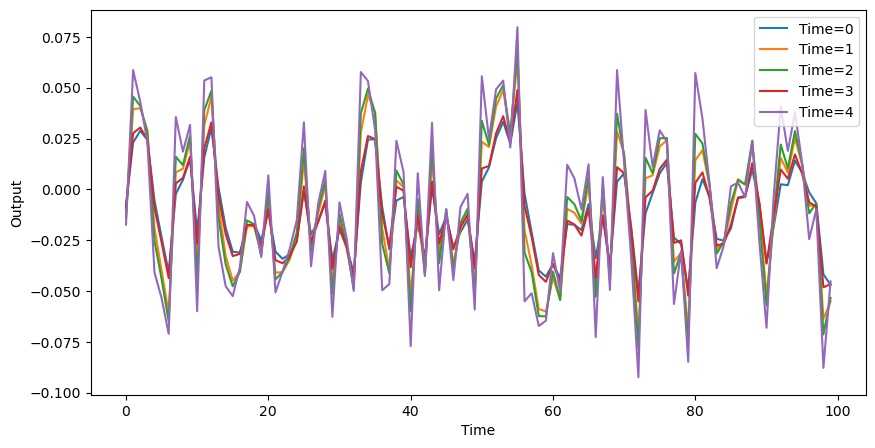

In [24]:
# 0. 数据保存
results = {}

plt.figure(figsize=(10, 5))
signal_seed = 42
input_signal = np.random.RandomState(signal_seed).rand(100, 1) - 0.5

# 0.1 温度扫描
# 注意：range(18, 23, 1)生成的是[18,19,20,21,22]
times = np.arange(5)

for time in times:
    # 1. Configs
    params_configs = Params(Nvirt=1, m0=0.03)

    # 2.1 ResConfigs for uniform
    weights = [0.2, 0.2, 0.4, 0.2, 0.2]
    res_configs_hetero = ResConfigs(morph_type='heterogeneous', n_instances=5, size_range=(15, 25), weights=weights)
    res_configs_hetero.beta_size_ref = 20 

    # TempConfigs 中应该包含 beta_temp_ref，注意检查定义
    temp_configs = TempConfigs(temp_mode='temp_sweep', beta_temp_ref=20, temp_range=(15, 25, 1))
    tims_configs = TIMsConfigs()

    # 3. build the Manager
    spn_hetero = ResManager(params_configs, res_configs_hetero, temp_configs, tims_configs, verbose=True)

    # 4. transform the signal
    env_temp = 20
    S_hetero, J_hetero = spn_hetero.transform(input_signal, env_temp)

    results[time] = S_hetero  

# 画图，每条线只设置一次legend，最后统一legend
for time, S in results.items():
    plt.plot(S, label=f"Time={time}")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Output")
plt.show()